In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from functools import reduce
from datetime import datetime, timezone
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

# 경고 무시
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 한글 출력
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' 
matplotlib.rcParams['font.size'] = 15 
matplotlib.rcParams['axes.unicode_minus']

True

In [2]:
origin_data = pd.read_csv('prep_data.csv')
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694175 entries, 0 to 694174
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tier                     694175 non-null  int64  
 1   rank                     694175 non-null  int64  
 2   winRate                  694175 non-null  float64
 3   veteran                  694175 non-null  int64  
 4   freshBlood               694175 non-null  int64  
 5   hotStreak                694175 non-null  int64  
 6   revisionDate             694175 non-null  int64  
 7   summonerLevel            694175 non-null  int64  
 8   championId               694175 non-null  int64  
 9   championLevel            694175 non-null  int64  
 10  championPoints           694175 non-null  int64  
 11  lastPlayTime             694175 non-null  int64  
 12  championSeasonMilestone  694175 non-null  int64  
 13  churn                    694175 non-null  int64  
dtypes: f

In [3]:
X = origin_data.drop(['churn','revisionDate'], axis=1)
y = origin_data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((520631, 12), (173544, 12), (520631,), (173544,))

In [4]:
origin_X = origin_data.drop([
    "tier", "rank", "winRate","veteran", "hotStreak", "revisionDate", "championId", "championLevel", "championPoints"], axis=1)
origin_y = origin_data['churn']

origin_X_train, origin_X_test, origin_y_train, origin_y_test = train_test_split(origin_X, origin_y, random_state=0)
origin_X_train.shape, origin_X_test.shape, origin_y_train.shape, origin_y_test.shape

((520631, 5), (173544, 5), (520631,), (173544,))

In [5]:
pca = PCA(n_components=3)
X_train_3d = pca.fit_transform(X_train)
X_test_3d = pca.fit_transform(X_test)

In [6]:
linear_model = LinearSVC()

linear_model.fit(X_train, y_train)

linear_score = linear_model.score(X_test, y_test)
print('LinearSVC 정확도:', linear_score)

LinearSVC 정확도: 0.8710874475637302


In [7]:
y_pred_train = linear_model.predict(X_train)
acc_score_train = accuracy_score(y_train, y_pred_train)
f1_score_train = f1_score(y_train, y_pred_train)
print(acc_score_train)
print(f1_score_train)

0.8728754146410798
0.014414843715098357


In [8]:
y_pred_test = linear_model.predict(X_test)
acc_score_test = accuracy_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test)
print(acc_score_test)
print(f1_score_test)

0.8710874475637302
0.013319220252271323


In [ ]:
# rbf_model = SVC(kernel='rbf', cache_size=8192)

# rbf_model.fit(X_train_3d, y_train)

# rbf_score = rbf_model.score(X_test_3d, y_test)

# print('rbf kernel 정확도:', rbf_score)

In [ ]:
def plot_3d_decision_boundary(X, y, model):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='coolwarm', s=60, edgecolors='k')

    xlim = (X[:, 0].min(), X[:, 0].max())
    ylim = (X[:, 1].min(), X[:, 1].max())
    zlim = (X[:, 2].min(), X[:, 2].max())

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30))

    zz = np.zeros_like(xx)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            zz[i, j] = model.predict(np.array([[xx[i, j], yy[i, j], 0]])) 

    ax.plot_surface(xx, yy, zz, color='green', alpha=0.3)

    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Feature 3")
    ax.set_title("SVM 3D Decision Boundary")

    plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_7060\2430122734.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  zz[i, j] = model.predict(np.array([[xx[i, j], yy[i, j], 0]]))
C:\Users\Playdata\AppData\Local\Temp\ipykernel_7060\2430122734.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  zz[i, j] = model.predict(np.array([[xx[i, j], yy[i, j], 0]]))
C:\Users\Playdata\AppData\Local\Temp\ipykernel_7060\2430122734.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

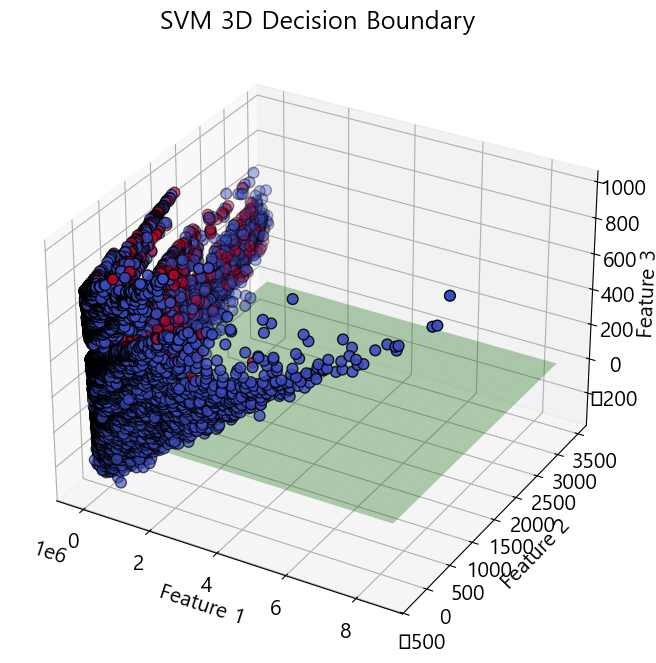

In [ ]:
plot_3d_decision_boundary(X_train_3d, y_train, linear_model)

C:\Users\Playdata\AppData\Local\Temp\ipykernel_20444\2430122734.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  zz[i, j] = model.predict(np.array([[xx[i, j], yy[i, j], 0]]))
C:\Users\Playdata\AppData\Local\Temp\ipykernel_20444\2430122734.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  zz[i, j] = model.predict(np.array([[xx[i, j], yy[i, j], 0]]))
C:\Users\Playdata\AppData\Local\Temp\ipykernel_20444\2430122734.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.2

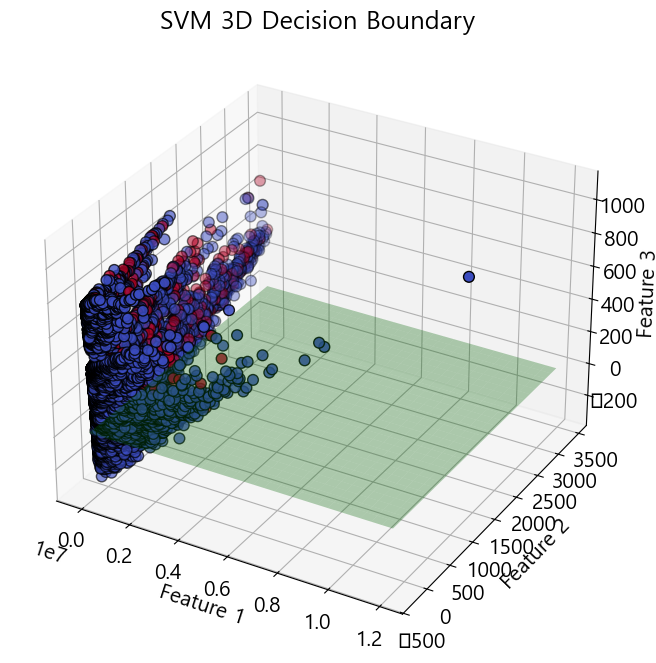

In [7]:
plot_3d_decision_boundary(X_test_3d, y_test, linear_model)

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
print("각 주성분의 설명 분산 비율:", explained_variance_ratio)

각 주성분의 설명 분산 비율: [9.99997879e-01 1.00665613e-06 7.09983443e-07]


In [ ]:
poly_model = SVC(kernel='poly')

poly_model.fit(X_train, y_train)

poly_score = poly_model.score(X_test, y_test)

print('poly kernel 정확도:', poly_score)

In [7]:
oversampling_data = pd.read_csv('oversampling_data.csv')
oversampling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210694 entries, 0 to 1210693
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   tier                     1210694 non-null  int64  
 1   rank                     1210694 non-null  int64  
 2   winRate                  1210694 non-null  float64
 3   veteran                  1210694 non-null  int64  
 4   freshBlood               1210694 non-null  int64  
 5   hotStreak                1210694 non-null  int64  
 6   revisionDate             1210694 non-null  int64  
 7   summonerLevel            1210694 non-null  int64  
 8   championId               1210694 non-null  int64  
 9   championLevel            1210694 non-null  int64  
 10  championPoints           1210694 non-null  int64  
 11  lastPlayTime             1210694 non-null  int64  
 12  championSeasonMilestone  1210694 non-null  int64  
 13  churn                    1210694 non-null 

---

In [8]:
over_X = oversampling_data.drop(['churn', 'revisionDate','championId'], axis=1)
over_y = oversampling_data['churn']

over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, random_state=0)
over_X_train.shape, over_X_test.shape, over_y_train.shape, over_y_test.shape

((908020, 11), (302674, 11), (908020,), (302674,))

In [9]:
over_linear_model = LinearSVC()

over_linear_model.fit(over_X_train, over_y_train)

over_linear_score = over_linear_model.score(over_X_test, over_y_test)
print('LinearSVC 정확도:', over_linear_score)

LinearSVC 정확도: 0.6378248544638786


In [10]:
over_y_pred_train = over_linear_model.predict(over_X_train)
over_acc_score_train = accuracy_score(over_y_train, over_y_pred_train)
over_f1_score_train = f1_score(over_y_train, over_y_pred_train)
print(over_acc_score_train)
print(over_f1_score_train)

0.6377480672231889
0.6516045391861749


In [11]:
over_y_pred_test = over_linear_model.predict(over_X_test)
over_acc_score_test = accuracy_score(over_y_test, over_y_pred_test)
over_f1_score_test = f1_score(over_y_test, over_y_pred_test)
print(over_acc_score_test)
print(over_f1_score_test)

0.6378248544638786
0.6518763635670756


In [ ]:
# pca = PCA(n_components=3)
# over_X_train_3d = pca.fit_transform(over_X_train)
# over_X_test_3d = pca.fit_transform(over_X_test)

In [12]:
scaler = StandardScaler()
over_X_train_scaled = scaler.fit_transform(over_X_train)
over_X_test_scaled = scaler.transform(over_X_test)

In [13]:
over_y_pred_train = over_linear_model.predict(over_X_train_scaled)
over_acc_score_train = accuracy_score(over_y_train, over_y_pred_train)
over_f1_score_train = f1_score(over_y_train, over_y_pred_train)
print(over_acc_score_train)
print(over_f1_score_train)

c:\Users\Playdata\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


0.6176119468734169
0.6276264424520612


In [14]:
over_y_pred_test = over_linear_model.predict(over_X_test)
over_acc_score_test = accuracy_score(over_y_test, over_y_pred_test)
over_f1_score_test = f1_score(over_y_test, over_y_pred_test)
print(over_acc_score_test)
print(over_f1_score_test)

0.6378248544638786
0.6518763635670756


In [15]:
pca = PCA(n_components=2)
over_X_train_2d = pca.fit_transform(over_X_train_scaled)
over_X_test_2d = pca.transform(over_X_test_scaled)

In [16]:
rbf_model = SVC(kernel='rbf', cache_size=2048)
# linear_model = SVC(kernel='linear')
# poly_model = SVC(kernel='poly')

rbf_model.fit(over_X_train_2d, over_y_train)
# linear_model.fit(X_train, y_train)
# poly_model.fit(over_X_train_2d, over_y_train)

rbf_score = rbf_model.score(over_X_test_2d, over_y_test)
# linear_score = linear_model.score(X_test, y_test)
# poly_score = poly_model.score(over_X_test_2d, over_y_test)

print('--- 각 kernel별 정확도 ---')
print('rbf:', rbf_score)
# print('linear:', linear_score)
# print('poly:', poly_score)

--- 각 kernel별 정확도 ---
rbf: 0.6749473030389131
